In [1]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import sys

sys.path.insert(1, "../../measures/intricacy/")
from calculate_intricacy import *

sys.path.insert(1, "../../measures/local spatial complexity/")
from calculate_local_spatial_complexity import *
import warnings

warnings.filterwarnings("ignore")

np.random.seed(34)

In [47]:
def calculate_measures(grid):
    LSC = calculate_local_spatial_complexity(grid, grid_size)
    intricacy = calculate_intricacy(grid, grid_size)
    return LSC, intricacy

def simulate_underlying_random(grid):
    measures = np.zeros((num_sims, 2))
    gray_indices = grid == 2
    for i in range(num_sims):
        grid_ = grid.copy()
        grid_[gray_indices] = np.random.choice([0, 1], size=np.sum(gray_indices))
        measures[i, :] = calculate_measures(grid_)
    meanLSC, meanInt = np.mean(measures, axis=0)
    return meanLSC, meanInt

def simulate_underlying_permutation(grid, pattern_id):
    measures = np.zeros((num_patterns - len(outlier_patterns) - 1, 2))
    gray_indices = grid == 2
    ind = 0
    for i in range(num_patterns):
        if i + 1 == pattern_id or i + 1 in outlier_patterns:
            continue
        grid_ = grid.copy()
        replacement_pattern = np.array(list(map(int, pattern_stats[pattern_stats["pattern_id"] == i + 1]["stimuli"].item()))).reshape(grid_size, grid_size)
        grid_[gray_indices] = replacement_pattern[gray_indices]
        measures[ind, :] = calculate_measures(grid_)
        ind += 1
    meanLSC, meanInt = np.mean(measures, axis=0)
    return meanLSC, meanInt

def simulate_visible_random(grid, LSC_nondetrended, Int_nondetrended):
    measures = np.zeros((num_sims, 2))
    non_gray_indices = grid != 2
    for i in range(num_sims):
        grid_ = grid.copy()
        grid_[non_gray_indices] = np.random.choice(
            [0, 1], size=np.sum(non_gray_indices)
        )
        measures[i, :] = calculate_measures(grid_)
    meanLSC, meanInt = np.mean(measures, axis=0)
    return LSC_nondetrended - meanLSC, Int_nondetrended - meanInt

def simulate_visible_permutation(grid, LSC_nondetrended, Int_nondetrended, pattern_id):
    measures = np.zeros((num_patterns - len(outlier_patterns) - 1, 2))
    non_gray_indices = grid != 2
    ind = 0
    for i in range(num_patterns):
        if i + 1 == pattern_id or i + 1 in outlier_patterns:
            continue
        grid_ = grid.copy()
        replacement_pattern = np.array(list(map(int, pattern_stats[pattern_stats["pattern_id"] == i + 1]["stimuli"].item()))).reshape(grid_size, grid_size)
        grid_[non_gray_indices] = replacement_pattern[non_gray_indices]
        measures[ind, :] = calculate_measures(grid_)
        ind += 1
    meanLSC, meanInt = np.mean(measures, axis=0)
    return LSC_nondetrended - meanLSC, Int_nondetrended - meanInt

In [25]:
pattern_stats = pd.read_csv("../../csvs/grid-search/pattern_stats.csv")

In [28]:
outlier_patterns = [23, 37, 86]

In [29]:
grid_size = 27
num_sims = 10
num_patterns = 98

grid_data = pd.read_csv("../../csvs/grid-search/grid_data_reevaluatedforreproduction.csv")
click_data = pd.read_csv("../../csvs/grid-search/click_data_reevaluatedforreproduction.csv")

In [ ]:
grid_data = grid_data.rename(columns={"fLSC": "fLSC_permutation", "fInt": "fInt_permutation"})

In [4]:
grid_data[["uLSC_randomised", "uInt_randomised"]] = grid_data.progress_apply(
    lambda row: pd.Series(
        simulate_underlying_random(
            np.array(list(map(int, row["final_grid"]))).reshape(
                grid_size, grid_size
            )
        )
    ),
    axis=1,
)

100%|██████████| 1291/1291 [17:38<00:00,  1.22it/s]


In [39]:
grid_data

,pname,pid,grid_id,pattern_id,num_clicks,uLSC,uInt,fLSC_nondetrended,fInt_nondetrended,time_taken,final_grid,fLSC_permutation,fInt_permutation,uLSC_randomised,uInt_randomised,uLSC_diff,uInt_diff,fLSC_random,fInt_random
0,jzptv7f8,1,1,53,81,0.956696,134,0.956696,134,35,1111111100000000000111111111111110011111111111...,0.220807,36.2,0.956696,134.00,2.220446e-15,0.00,-0.022481,18.59
1,jzptv7f8,1,2,50,81,0.183665,10,0.183665,10,33,0000000000000000000000000000000000000000000000...,-0.466275,-47.4,0.183665,10.00,1.665335e-16,0.00,-0.795868,-105.70
2,jzptv7f8,1,3,54,81,0.966294,64,0.966294,64,40,1100000001000000010000000100011101111000000011...,0.259555,9.9,0.966294,64.00,-1.221245e-15,0.00,-0.013036,-52.05
3,jzptv7f8,1,4,52,70,0.898609,78,1.025236,84,29,2222220000011111000002222222222220000110001100...,0.153778,-93.7,0.957335,97.32,-5.872530e-02,-19.32,-0.050609,-23.95
4,jzptv7f8,1,5,55,81,0.971760,103,0.971760,103,31,0010110001110101110001101000010100010110001101...,0.393860,63.8,0.971760,103.00,-3.330669e-16,0.00,-0.007510,-12.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,e3200kck,29,11,66,81,0.714320,186,0.714320,186,118,1111111111111111111111111111110101110111111101...,-0.052284,124.4,0.714320,186.00,1.110223e-15,0.00,-0.265096,68.58
1287,e3200kck,29,12,65,81,0.445628,18,0.445628,18,71,0000000000000000000000000000000000000000000000...,-0.356165,-59.5,0.445628,18.00,-1.110223e-15,0.00,-0.533740,-96.85
1288,e3200kck,29,13,69,81,0.902179,86,0.902179,86,69,1000010000000000000001000010001001111111111111...,0.064891,11.0,0.902179,86.00,-1.332268e-15,0.00,-0.077119,-28.28
1289,e3200kck,29,14,68,81,0.862483,147,0.862483,147,87,0100100000000000000000100101010000000000000000...,0.107252,65.1,0.862483,147.00,1.332268e-15,0.00,-0.117106,30.31


In [43]:
grid_data[["uLSC_permutation", "uInt_permutation"]] = grid_data.progress_apply(
    lambda row: pd.Series(
        simulate_underlying_permutation(
            np.array(list(map(int, row["final_grid"]))).reshape(
                grid_size, grid_size
            ), row["pattern_id"]
        )
    ),
    axis=1,
)

100%|██████████| 1256/1256 [15:54<00:00,  1.32it/s]


In [15]:
grid_data[["fLSC_random", "fInt_random"]] = grid_data.progress_apply(
    lambda row: pd.Series(
        simulate_visible_random(
            np.array(list(map(int, row["final_grid"]))).reshape(
                grid_size, grid_size
            ),
            row["fLSC_nondetrended"],
            row["fInt_nondetrended"],
        )
    ),
    axis=1,
)

100%|██████████| 1256/1256 [31:19<00:00,  1.50s/it]


In [56]:
grid_data[["fLSC_permutation_full", "fInt_permutation_full"]] = grid_data.progress_apply(
    lambda row: pd.Series(
        simulate_visible_permutation(
            np.array(list(map(int, row["final_grid"]))).reshape(grid_size, grid_size),
            row["fLSC_nondetrended"],
            row["fInt_nondetrended"],
            row["pattern_id"]
        )
    ),
    axis=1,
)

100%|██████████| 1256/1256 [30:07<00:00,  1.44s/it]


In [57]:
grid_data

,pname,pid,grid_id,pattern_id,num_clicks,uLSC,uInt,fLSC_nondetrended,fInt_nondetrended,time_taken,...,uLSC_randomised,uInt_randomised,uLSC_diff,uInt_diff,fLSC_random,fInt_random,uLSC_permutation,uInt_permutation,fLSC_permutation_full,fInt_permutation_full
0,jzptv7f8,1,1,53,81,0.956696,134,0.956696,134,35,...,0.956696,134.00,2.220446e-15,0.00,-0.022481,18.59,0.956696,134.000000,0.238955,73.436170
1,jzptv7f8,1,2,50,81,0.183665,10,0.183665,10,33,...,0.183665,10.00,1.665335e-16,0.00,-0.795868,-105.70,0.183665,10.000000,-0.542301,-51.882979
2,jzptv7f8,1,3,54,81,0.966294,64,0.966294,64,40,...,0.966294,64.00,-1.221245e-15,0.00,-0.013036,-52.05,0.966294,64.000000,0.248654,2.691489
3,jzptv7f8,1,4,52,70,0.898609,78,1.025236,84,29,...,0.957335,97.32,-5.872530e-02,-19.32,-0.050609,-23.95,0.943092,91.021277,0.183633,25.585106
4,jzptv7f8,1,5,55,81,0.971760,103,0.971760,103,31,...,0.971760,103.00,-3.330669e-16,0.00,-0.007510,-12.40,0.971760,103.000000,0.254178,42.106383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,e3200kck,29,11,66,81,0.714320,186,0.714320,186,118,...,0.714320,186.00,1.110223e-15,0.00,-0.265096,68.58,0.714320,186.000000,-0.006000,125.989362
1287,e3200kck,29,12,65,81,0.445628,18,0.445628,18,71,...,0.445628,18.00,-1.110223e-15,0.00,-0.533740,-96.85,0.445628,18.000000,-0.277551,-43.797872
1288,e3200kck,29,13,69,81,0.902179,86,0.902179,86,69,...,0.902179,86.00,-1.332268e-15,0.00,-0.077119,-28.28,0.902179,86.000000,0.183857,24.925532
1289,e3200kck,29,14,68,81,0.862483,147,0.862483,147,87,...,0.862483,147.00,1.332268e-15,0.00,-0.117106,30.31,0.862483,147.000000,0.143739,86.574468


In [60]:
grid_data["uLSC_diff"] = grid_data["uLSC"] - grid_data["uLSC_permutation"]

In [61]:
grid_data["uInt_diff"] = grid_data["uInt"] - grid_data["uInt_permutation"]

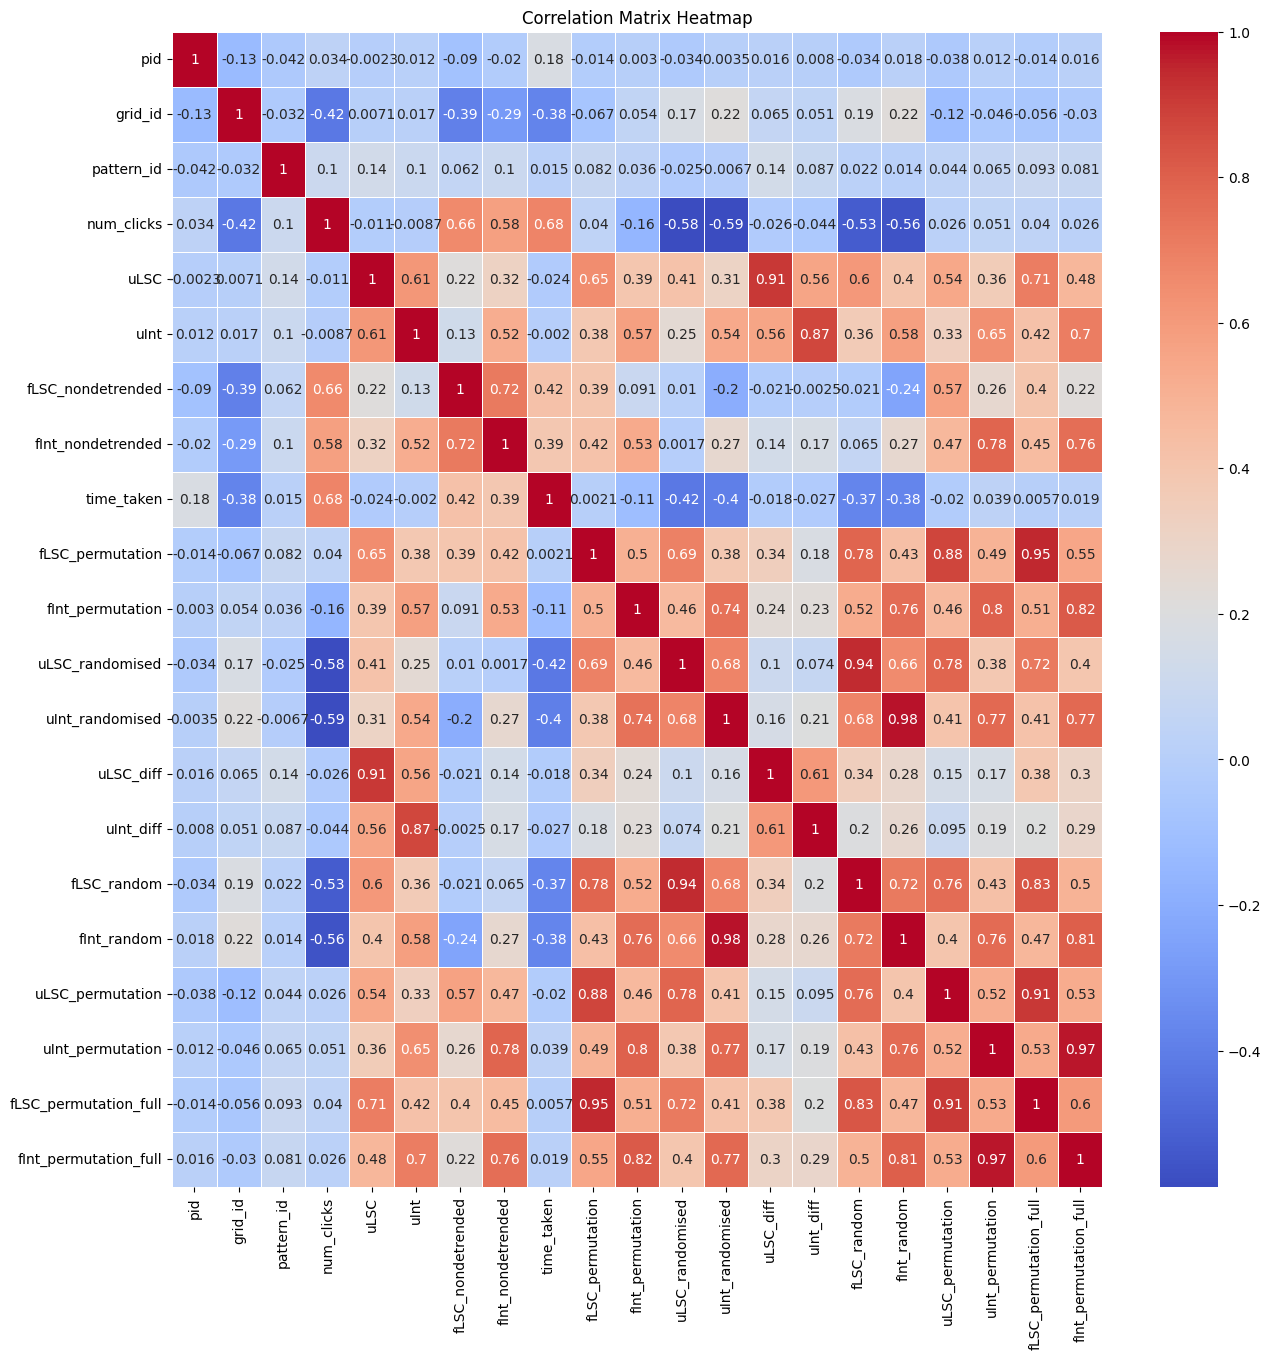

In [62]:
corr = grid_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

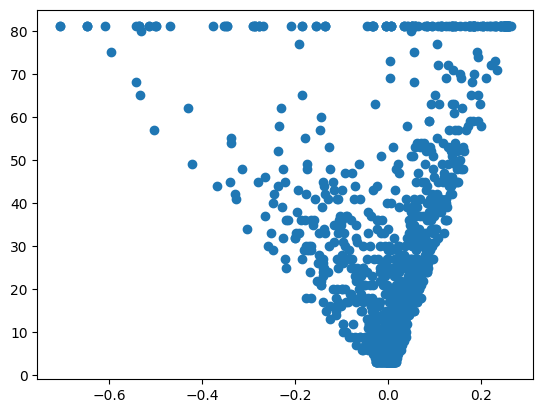

In [69]:
plt.scatter(grid_data["fLSC_permutation_full"], grid_data["num_clicks"])

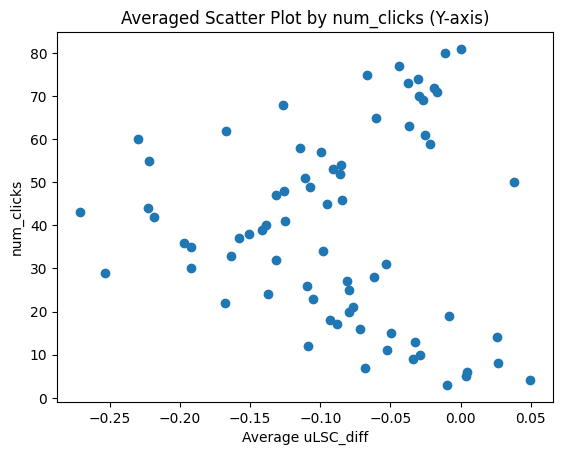

In [77]:
averaged_data = grid_data.groupby("num_clicks")["uLSC_diff"].mean().reset_index()

# Plot the averaged data
plt.scatter(averaged_data["uLSC_diff"], averaged_data["num_clicks"])
plt.xlabel("Average uLSC_diff")
plt.ylabel("num_clicks")
plt.title("Averaged Scatter Plot by num_clicks (Y-axis)")
plt.show()

In [12]:
grid_data = grid_data[grid_data["uInt"] < 300]

In [13]:
grid_data

,pname,pid,grid_id,pattern_id,num_clicks,uLSC,uInt,fLSC_nondetrended,fInt_nondetrended,time_taken,final_grid,fLSC_permutation,fInt_permutation,uLSC_randomised,uInt_randomised,uLSC_diff,uInt_diff
0,jzptv7f8,1,1,53,81,0.956696,134,0.956696,134,35,1111111100000000000111111111111110011111111111...,0.220807,36.2,0.956696,134.00,2.220446e-15,0.00
1,jzptv7f8,1,2,50,81,0.183665,10,0.183665,10,33,0000000000000000000000000000000000000000000000...,-0.466275,-47.4,0.183665,10.00,1.665335e-16,0.00
2,jzptv7f8,1,3,54,81,0.966294,64,0.966294,64,40,1100000001000000010000000100011101111000000011...,0.259555,9.9,0.966294,64.00,-1.221245e-15,0.00
3,jzptv7f8,1,4,52,70,0.898609,78,1.025236,84,29,2222220000011111000002222222222220000110001100...,0.153778,-93.7,0.957335,97.32,-5.872530e-02,-19.32
4,jzptv7f8,1,5,55,81,0.971760,103,0.971760,103,31,0010110001110101110001101000010100010110001101...,0.393860,63.8,0.971760,103.00,-3.330669e-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,e3200kck,29,11,66,81,0.714320,186,0.714320,186,118,1111111111111111111111111111110101110111111101...,-0.052284,124.4,0.714320,186.00,1.110223e-15,0.00
1287,e3200kck,29,12,65,81,0.445628,18,0.445628,18,71,0000000000000000000000000000000000000000000000...,-0.356165,-59.5,0.445628,18.00,-1.110223e-15,0.00
1288,e3200kck,29,13,69,81,0.902179,86,0.902179,86,69,1000010000000000000001000010001001111111111111...,0.064891,11.0,0.902179,86.00,-1.332268e-15,0.00
1289,e3200kck,29,14,68,81,0.862483,147,0.862483,147,87,0100100000000000000000100101010000000000000000...,0.107252,65.1,0.862483,147.00,1.332268e-15,0.00


In [63]:
# grid_data.to_csv("../../csvs/grid-search/grid_data_reevaluatedforreproduction_withoutoutliers.csv", index = False)

In [ ]:
# click_data[["uLSC_randomised", "uInt_randomised"]] = click_data.apply(
#     lambda row: pd.Series(
#         simulate_underlying(
#             np.array(list(map(int, row["current_grid"]))).reshape(
#                 grid_size, grid_size
#             )
#         )
#     ),
#     axis=1,
# )

# click_data[["cLSC", "cInt"]] = click_data.apply(
#     lambda row: pd.Series(
#         simulate_visible(
#             np.array(list(map(int, row["current_grid"]))).reshape(
#                 grid_size, grid_size
#             ),
#             row["cLSC_nondetrended"],
#             row["cInt_nondetrended"],
#         )
#     ),
#     axis=1,
# )